In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Módulos y configuración

In [10]:
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append("../") # El módulo está en el directorio superior
import numepidem.SIR_react_diffusion_1d as SIR_scheme
from numepidem.SIR_react_diffusion_1d import test_name, run_test
#plt.style.use('seaborn-pastel')
plt.style.use('seaborn-dark')
plt.rcParams["figure.dpi"] = 100

## Ejecutar el test numérico

In [11]:
from copy import copy

parameters = copy(SIR_scheme.default_parameters)
parameters["nx"] = 5000
parameters["dt"] = 5.e-3
parameters["n_iter"] = 100
parameters["beta"] = 1.e-3 # Infection rate
parameters["mu"] = 0 # Nacimientos

def test_1 (parameters):
    import time
 
    print ( f'{test_name}:' )
    print ( '  FENICS/Python version' )
    print ( '  Implicit solver.' )
    print ( ' ', time.ctime ( time.time() ) )

    plot_each_iteration = False
    
    S = [] # S[i] = distribution of susceptibles at time setp i
    I = [] # I[i] = distribution of infected at time setp i
    R = [] # R[i] = distribution of recovered at time setp i
    
    iter = 0
    for S_i, I_i, R_i in run_test ( parameters, plot_options={ "save": False } ):

        S.append(S_i[:]); I.append(I_i[:]); R.append(R_i[:])

        if plot_each_iteration:
            plt.plot(S, lw=2, label="(S)usceptibles")
            plt.plot(I, lw=2, label="(I)nfectados")
            plt.plot(R, lw=2, label="(R)ecovered")

            plt.legend()
            plt.grid()
            plt.show()

    print ( '' )
    print ( f"{test_name}:" )
    print ( '  Normal end of execution.' )
    print ( '' )
    print ( time.ctime ( time.time() ) )
    return S, I, R

S, I, R = test_1(parameters)

SIR_react_difuss_1d:
  FENICS/Python version
  Implicit solver.
  Sat Nov 20 18:55:01 2021
Total number of individuals: 325594.4990946427

SIR_react_difuss_1d:
  Normal end of execution.

Sat Nov 20 18:55:05 2021


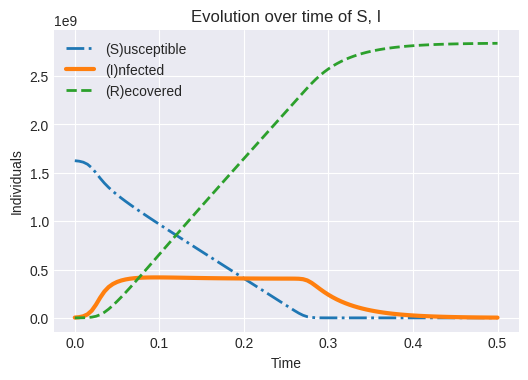

In [12]:
def plot_summary_over_time(individuals, parameters, verbosity=0):
    S, I, R = individuals
    
    # 1. Sum mumber of individuals at each time iteration
    
    S_sum = [] # Total number of susceptible at each time step
    I_sum = [] # Total number of infected at each time step
    R_sum = [] # Total number of infected at each time step
    for i in range(len(S)):
        S_sum.append(np.sum(S[i]))
        I_sum.append(np.sum(I[i]))
        R_sum.append(np.sum(R[i]))
        if verbosity:
            print(f"Total Susceptibles: {S_sum[-1]}")
            print(f"Total Infectados  : {I_sum[-1]}")
            print(f"Total Recuperados : {R_sum[-1]}")
            
    # 2. Plot S, I over time
        
    dt=parameters["dt"]
    nt=parameters["n_iter"]
    t_grid = np.linspace(0, nt*dt, nt+1)
    plt.title("Evolution over time of S, I")
    plt.plot(t_grid, S_sum, "-.", lw=2, label="(S)usceptible")
    plt.plot(t_grid, I_sum,  "-", lw=3, label="(I)nfected")
    plt.plot(t_grid, R_sum, "--", lw=2, label="(R)ecovered")
    plt.xlabel("Time")
    plt.ylabel("Individuals")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    plt.grid()
    plt.legend()
    plt.show()


plot_summary_over_time([S, I, R], parameters)

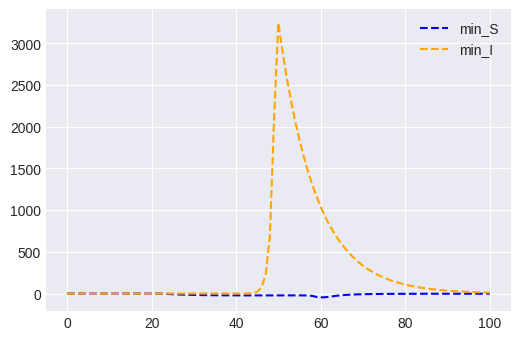

In [13]:
def plot_max_min_over_time(individuals, parameters, verbosity=0):
    S, I, R = individuals
    
    n = len(S)
    t_iters = np.arange(n)
    zeros = np.zeros(n)
    
    max_S = np.array( [np.max(S[i]) for i in range(n)] )
    min_S = np.array( [np.min(S[i]) for i in range(n)] )
    #plt.plot(t_iters, max_S, "-",  c="orange", label="max_S")
    plt.plot(t_iters, np.minimum(zeros, min_S), "--", c="blue", label="min_S")
    
    max_I = np.array( [np.max(I[i]) for i in range(n)] )
    min_I = np.array( [np.min(I[i]) for i in range(n)] )
    #plt.plot(t_iters, max_I, "-",  c="orange", label="max_I")
    plt.plot(t_iters, min_I, "--", c="orange", label="min_I")
    
    max_R = np.array( [np.max(R[i]) for i in range(n)] )
    min_R = np.array( [np.min(R[i]) for i in range(n)] )
    #plt.plot(t_iters, max_R, "-",  c="orange", label="max_S")
    #plt.plot(t_iters, np.minimum(zeros, min_R), "--", c="green", label="min_R")
  
    plt.grid()
    plt.legend()
    
plot_max_min_over_time([S,I,R], parameters)

## Crear un vídeo con los resultados

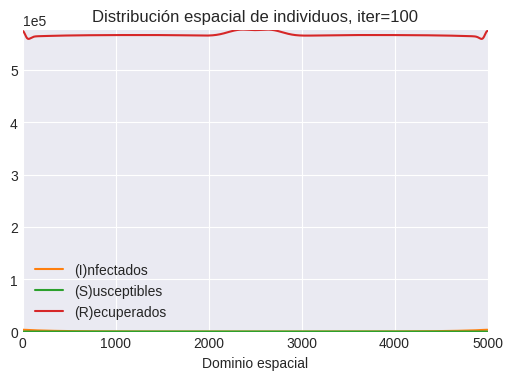

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image

from matplotlib import animation
from IPython.display import HTML

Nx = len(S[0])
Nt = len(S)
x = np.arange(Nx)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
maxS, maxI, maxR = np.max(S[:][:]), np.max(I[:][:]), np.max(R[:][:])
minS, minI, minR = np.min(S[:][:]), np.min(I[:][:]), np.min(R[:][:])

y0 = min(minS, minI, minR)
y1 = max(maxS, maxI, maxR)

ax = plt.axes( xlim=(0, Nx), ylim=(y0,y1) )
ax.grid()
ax.set_xlabel("Dominio espacial")
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

line, = ax.plot([], [], lw=1) 

lines = []
for index in range(3): # S, I, R
    lobj = ax.plot([],[])[0]
    lines.append(lobj)
    
# Initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([],[])
    return lines


# Animation function which updates figure data.  This is called sequentially
def animate(i):
    y_list = [ I[i], S[i], R[i] ]
    #y_list = [np.minimum(np.zeros_like(v), v) for v in y_list]
    label_list = ["(I)nfectados", "(S)usceptibles", "(R)ecuperados"]
    for lnum, line in enumerate(lines):
        line.set_data(x, y_list[lnum]) # set data for each line separately. 
        line.set_label(label_list[lnum])
    ax.set_title(f"Distribución espacial de individuos, iter={i}")
    ax.legend()
    return lines

# Call the animator.  blit=True means only rehttp://localhost:8888/notebooks/src/modelos_epidemia/modelos-difusion/Untitled2.ipynb#-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=300, blit=True)

#plt.close(anim._fig)

# Call function to display the animation
HTML(anim.to_html5_video())
